In [76]:
import glob
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import numpy as np

from HOG import HOG

In [30]:
human_images = glob.glob("humans/*")
non_human_images = glob.glob("non_humans/*")
len(human_images), len(non_human_images)

(15, 23)

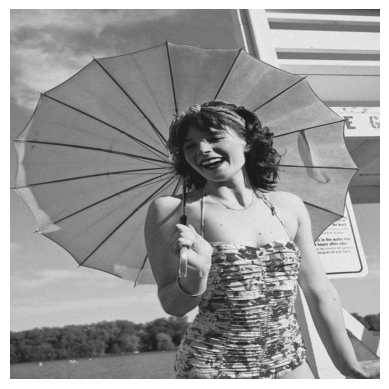

In [35]:
image = io.imread(human_images[0], as_gray=True)
image = cv2.resize(image, (1024, 1024))
plt.imshow(image, cmap="gray")
plt.axis("off");

In [36]:
w = 32
h = 32
nbins = 9

In [37]:
human_grads = []
non_human_grads = []

In [38]:
for human_image in tqdm(human_images):
    image = io.imread(human_image, as_gray=True)
    image = cv2.resize(image, (1024, 1024))
    human_grads.append(HOG(image, w, h, nbins))

100%|██████████| 15/15 [04:14<00:00, 16.97s/it]


In [39]:
for non_human_image in tqdm(non_human_images):
    image = io.imread(non_human_image, as_gray=True)
    image = cv2.resize(image, (1024, 1024))
    non_human_grads.append(HOG(image, w, h, nbins))

100%|██████████| 23/23 [06:27<00:00, 16.85s/it]


In [77]:
cls = SVC()

In [78]:
X = human_grads + non_human_grads
X = [np.array(x).flatten() for x in X]
y = [1] * len(human_grads) + [0] * len(non_human_grads)

In [79]:
len(X), len(y)

(38, 38)

In [80]:
cls.fit(X, y)

SVC()

In [81]:
y_pred = cls.predict(X)

In [82]:
accuracy_score(y, y_pred)

0.868421052631579

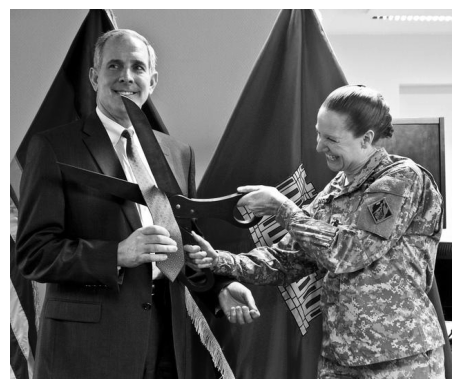

In [83]:
image = io.imread("test_human.jpg", as_gray=True)
plt.imshow(image, cmap="gray")
plt.axis("off");

In [84]:
image = cv2.resize(image, (1024, 1024))
grads = HOG(image, w, h, nbins)

In [86]:
cls.predict([np.array(grads).flatten()])

array([1])

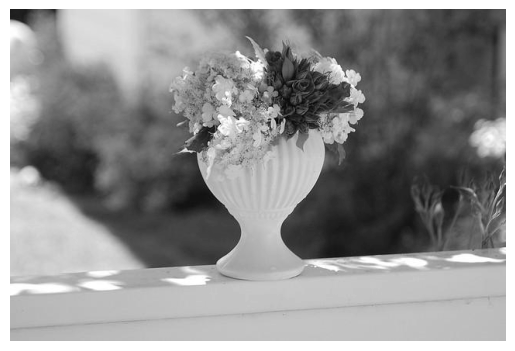

In [87]:
image = io.imread("test_non_human.jpg", as_gray=True)
plt.imshow(image, cmap="gray")
plt.axis("off");

In [88]:
image = cv2.resize(image, (1024, 1024))
grads = HOG(image, w, h, nbins)

In [89]:
cls.predict([np.array(grads).flatten()])

array([0])